In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as numpy

In [166]:
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_cat = data[["Email","Address"]]


In [167]:
#data_num.head(5)

In [168]:
#data_num.shape

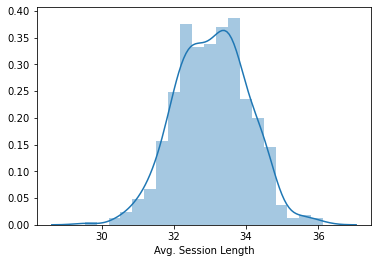

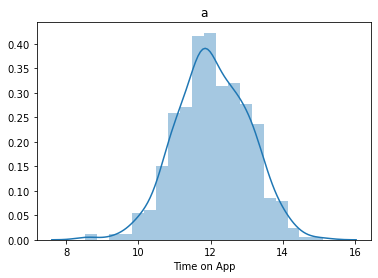

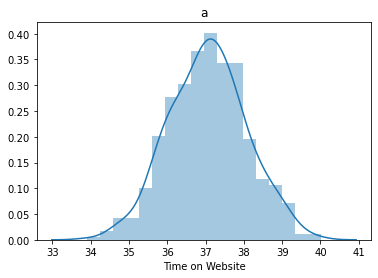

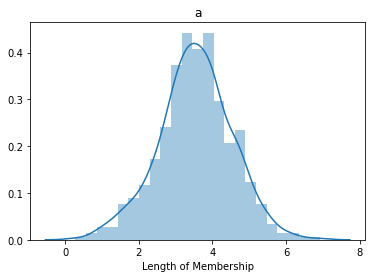

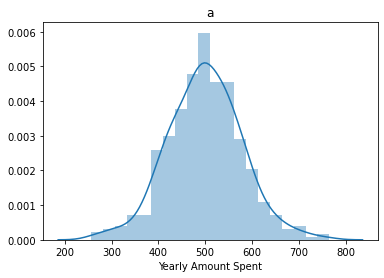

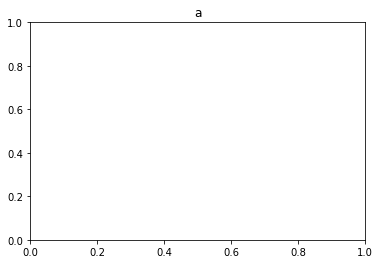

In [174]:
#Univariate visual data analysis 

def distplot(x):
    for i in x:
        sns.distplot(data_num[i])
        plt.show()
        plt.title('a')


distplot(data_num)

In [164]:
#bivariate data analysis

'''def scatter (x):
    for i in data_num:
        sns.scatterplot(x=i, y=data_num['Yearly Amount Spent'], data=data_num)
        plt.show()
        plt.title('Streudiagramm numerischer Variabeln')'''


'''for i in count():
    sns.jointplot(x="Yearly Amount Spent",y = "Length of Membership", data=data_num, kind='reg'
    sns.set_context('talk', font_scale=1.4)'''

SyntaxError: invalid syntax (<ipython-input-164-f40f885866b1>, line 13)

In [163]:

def scatter (x):
    for i in x:
        sns.scatterplot(x=i, y=data_num["Length of Membership"], data=data_num)
        plt.show()
        plt.title('Streudiagramm numerischer Variabeln')

In [162]:
scatter(data_num)

ValueError: array length 1 does not match index length 500